<a href="https://colab.research.google.com/github/reenaverma97/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_individual_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [6]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
hoteldata_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
hoteldata_df= pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [12]:
hoteldata_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
hoteldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
#creating some copy of data frame
new_dataframe = hoteldata_df.copy()

In [15]:
new_dataframe['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
new_dataframe['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [17]:
new_dataframe['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [18]:
new_dataframe['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [19]:
new_dataframe['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [20]:
new_dataframe['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

## step1 finding missing value 

In [21]:
# Columns having missing values.
new_dataframe.isnull().sum().sort_values(ascending = False)[:7]


company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns

In [22]:
new_dataframe[['company','agent']] = new_dataframe[['company','agent']].fillna(0)

In [23]:
new_dataframe['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [24]:
new_dataframe['children'].fillna(new_dataframe['children'].mean(), inplace = True)

In [25]:
new_dataframe['country'].fillna('others', inplace = True)

In [26]:
# Checking if all null values are removed
new_dataframe.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [27]:
new_dataframe[new_dataframe['adults']+new_dataframe['babies']+new_dataframe['children'] == 0].shape

(180, 32)

In [28]:
new_dataframe.drop(new_dataframe[new_dataframe['adults']+new_dataframe['babies']+new_dataframe['children'] == 0].index, inplace = True)

##Step 2: Adding important columns

In [29]:
# Adding total staying days in hotels
new_dataframe['total_stay'] = new_dataframe['stays_in_weekend_nights']+new_dataframe['stays_in_week_nights']

In [30]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
new_dataframe['total_people'] = new_dataframe['adults']+new_dataframe['children']+new_dataframe['babies']

##EDA
Lets first find the correlation between the numerical data.\ \

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.\ \

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns

In [31]:
Dataframe_1 = new_dataframe[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay',	'total_people',]]

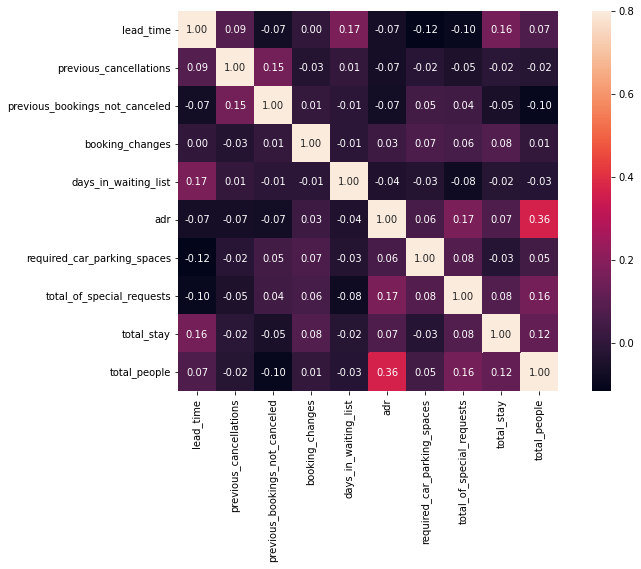

In [32]:
#correlation matrix
corrmat = Dataframe_1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

#Some straight forward questions

Q1)how much total_of_special_requests ?

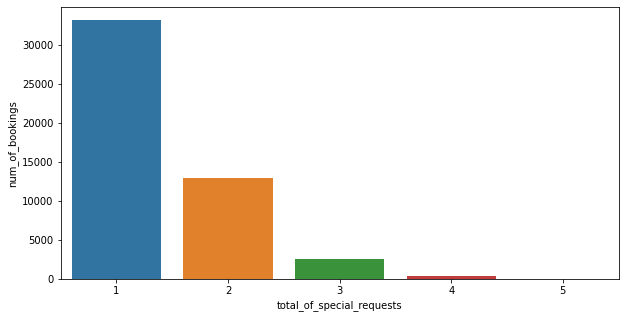

In [33]:
new_dataframe = pd.DataFrame(new_dataframe['total_of_special_requests'].value_counts()).reset_index().rename(columns = {'index':'total_of_special_requests','total_of_special_requests':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
new_dataframe.drop(new_dataframe[new_dataframe['total_of_special_requests'] == 0].index, inplace = True)            # 0 represents that there is no  total_of_special_requests
new_dataframe = new_dataframe[:10]                                                   # Selecting top 10  total_of_special_requests
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_of_special_requests', y = 'num_of_bookings', data = new_dataframe, order = new_dataframe.sort_values('num_of_bookings', ascending = False).total_of_special_requests)

at the place of 1 the total  number of special requests are higher then other 

Q2) Which room type is in most demand and which room type generatest highest adr?

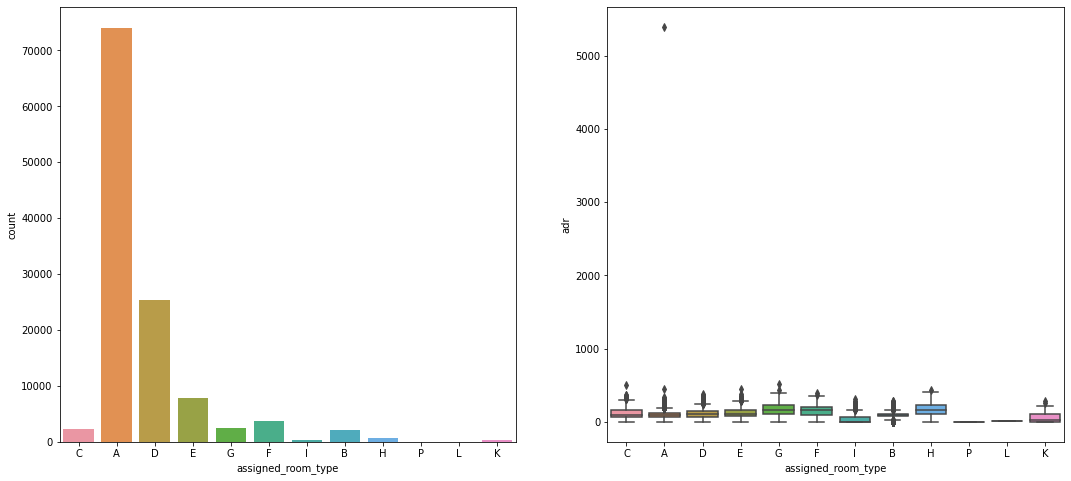

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hoteldata_df.groupby('assigned_room_type')
new_dataframe['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hoteldata_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hoteldata_df['assigned_room_type'], y = hoteldata_df['adr'])
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.


Q3) What is percentage of bookings in each hotel?

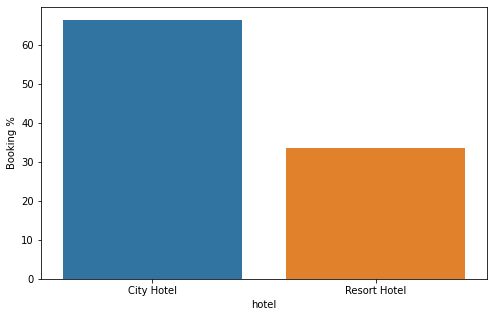

In [35]:
grouped_by_hotel = hoteldata_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hoteldata_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel

Q4)what is the waiting list in days?


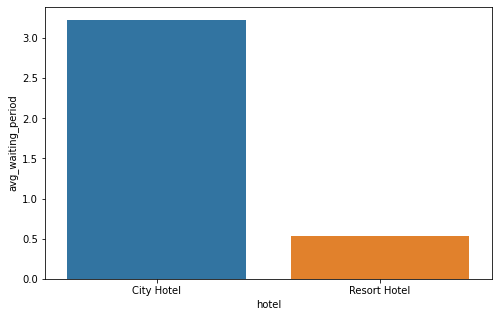

In [36]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

Q5) what was the repeateded guest number ?

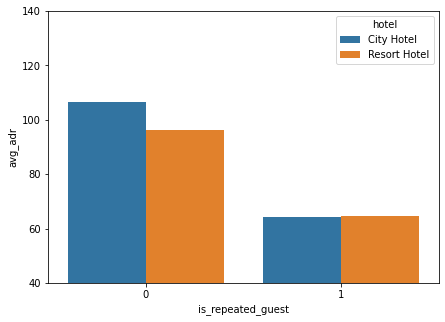

In [38]:
repeateded_guest = hoteldata_df.groupby(['is_repeated_guest', 'hotel'])
d5 = pd.DataFrame(round((repeateded_guest['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['is_repeated_guest'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

city hotel has more repeateded guest as compare to resort hotels 

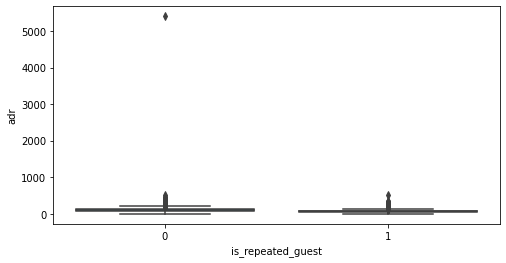

In [39]:
plt.figure(figsize = (8,4))
sns.boxplot(x='is_repeated_guest',y = 'adr',data =hoteldata_df )
plt.show()

Q6) Which channel is mostly used for early booking of hotels?

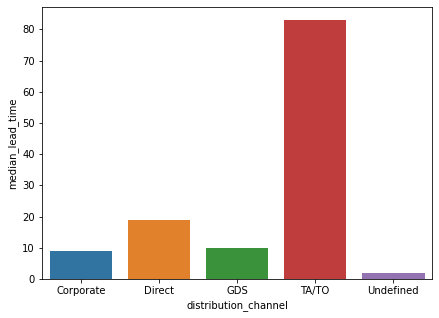

In [40]:
group_by_dc = hoteldata_df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

In [41]:
cat_cols=["hotel","arrival_date_month","meal","country","market_segment","is_canceled","distribution_channel","reserved_room_type","assigned_room_type"]

In [42]:
num_cols = [c for c in hoteldata_df.columns if c not in cat_cols]
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [43]:
num_cols.pop(-1) 
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status']

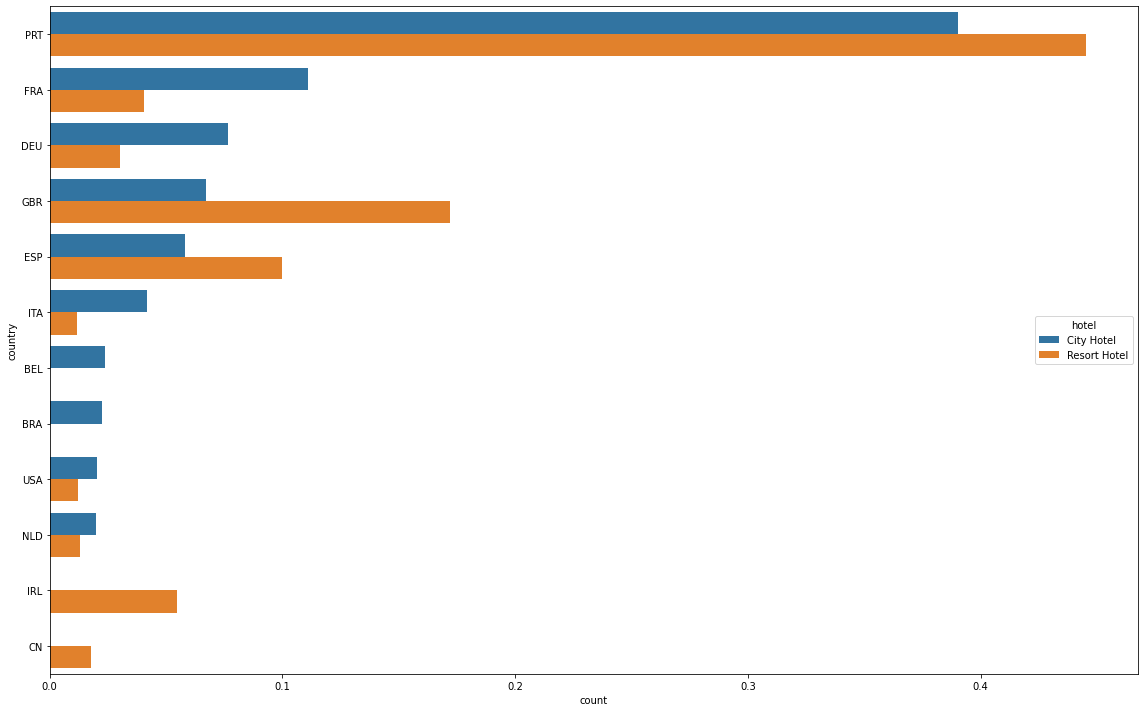

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10))

fltr = hoteldata_df["hotel"] == "City Hotel"
vc_a = hoteldata_df[fltr]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'}, axis=1)

vc_b = hoteldata_df[~fltr]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'}, axis=1)

vc_a["hotel"] = "City Hotel"
vc_b["hotel"] = "Resort Hotel"

df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

_ = sns.barplot(y = 'country', x = 'count', data =df , hue="hotel")
    
    
_ = plt.tight_layout()

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

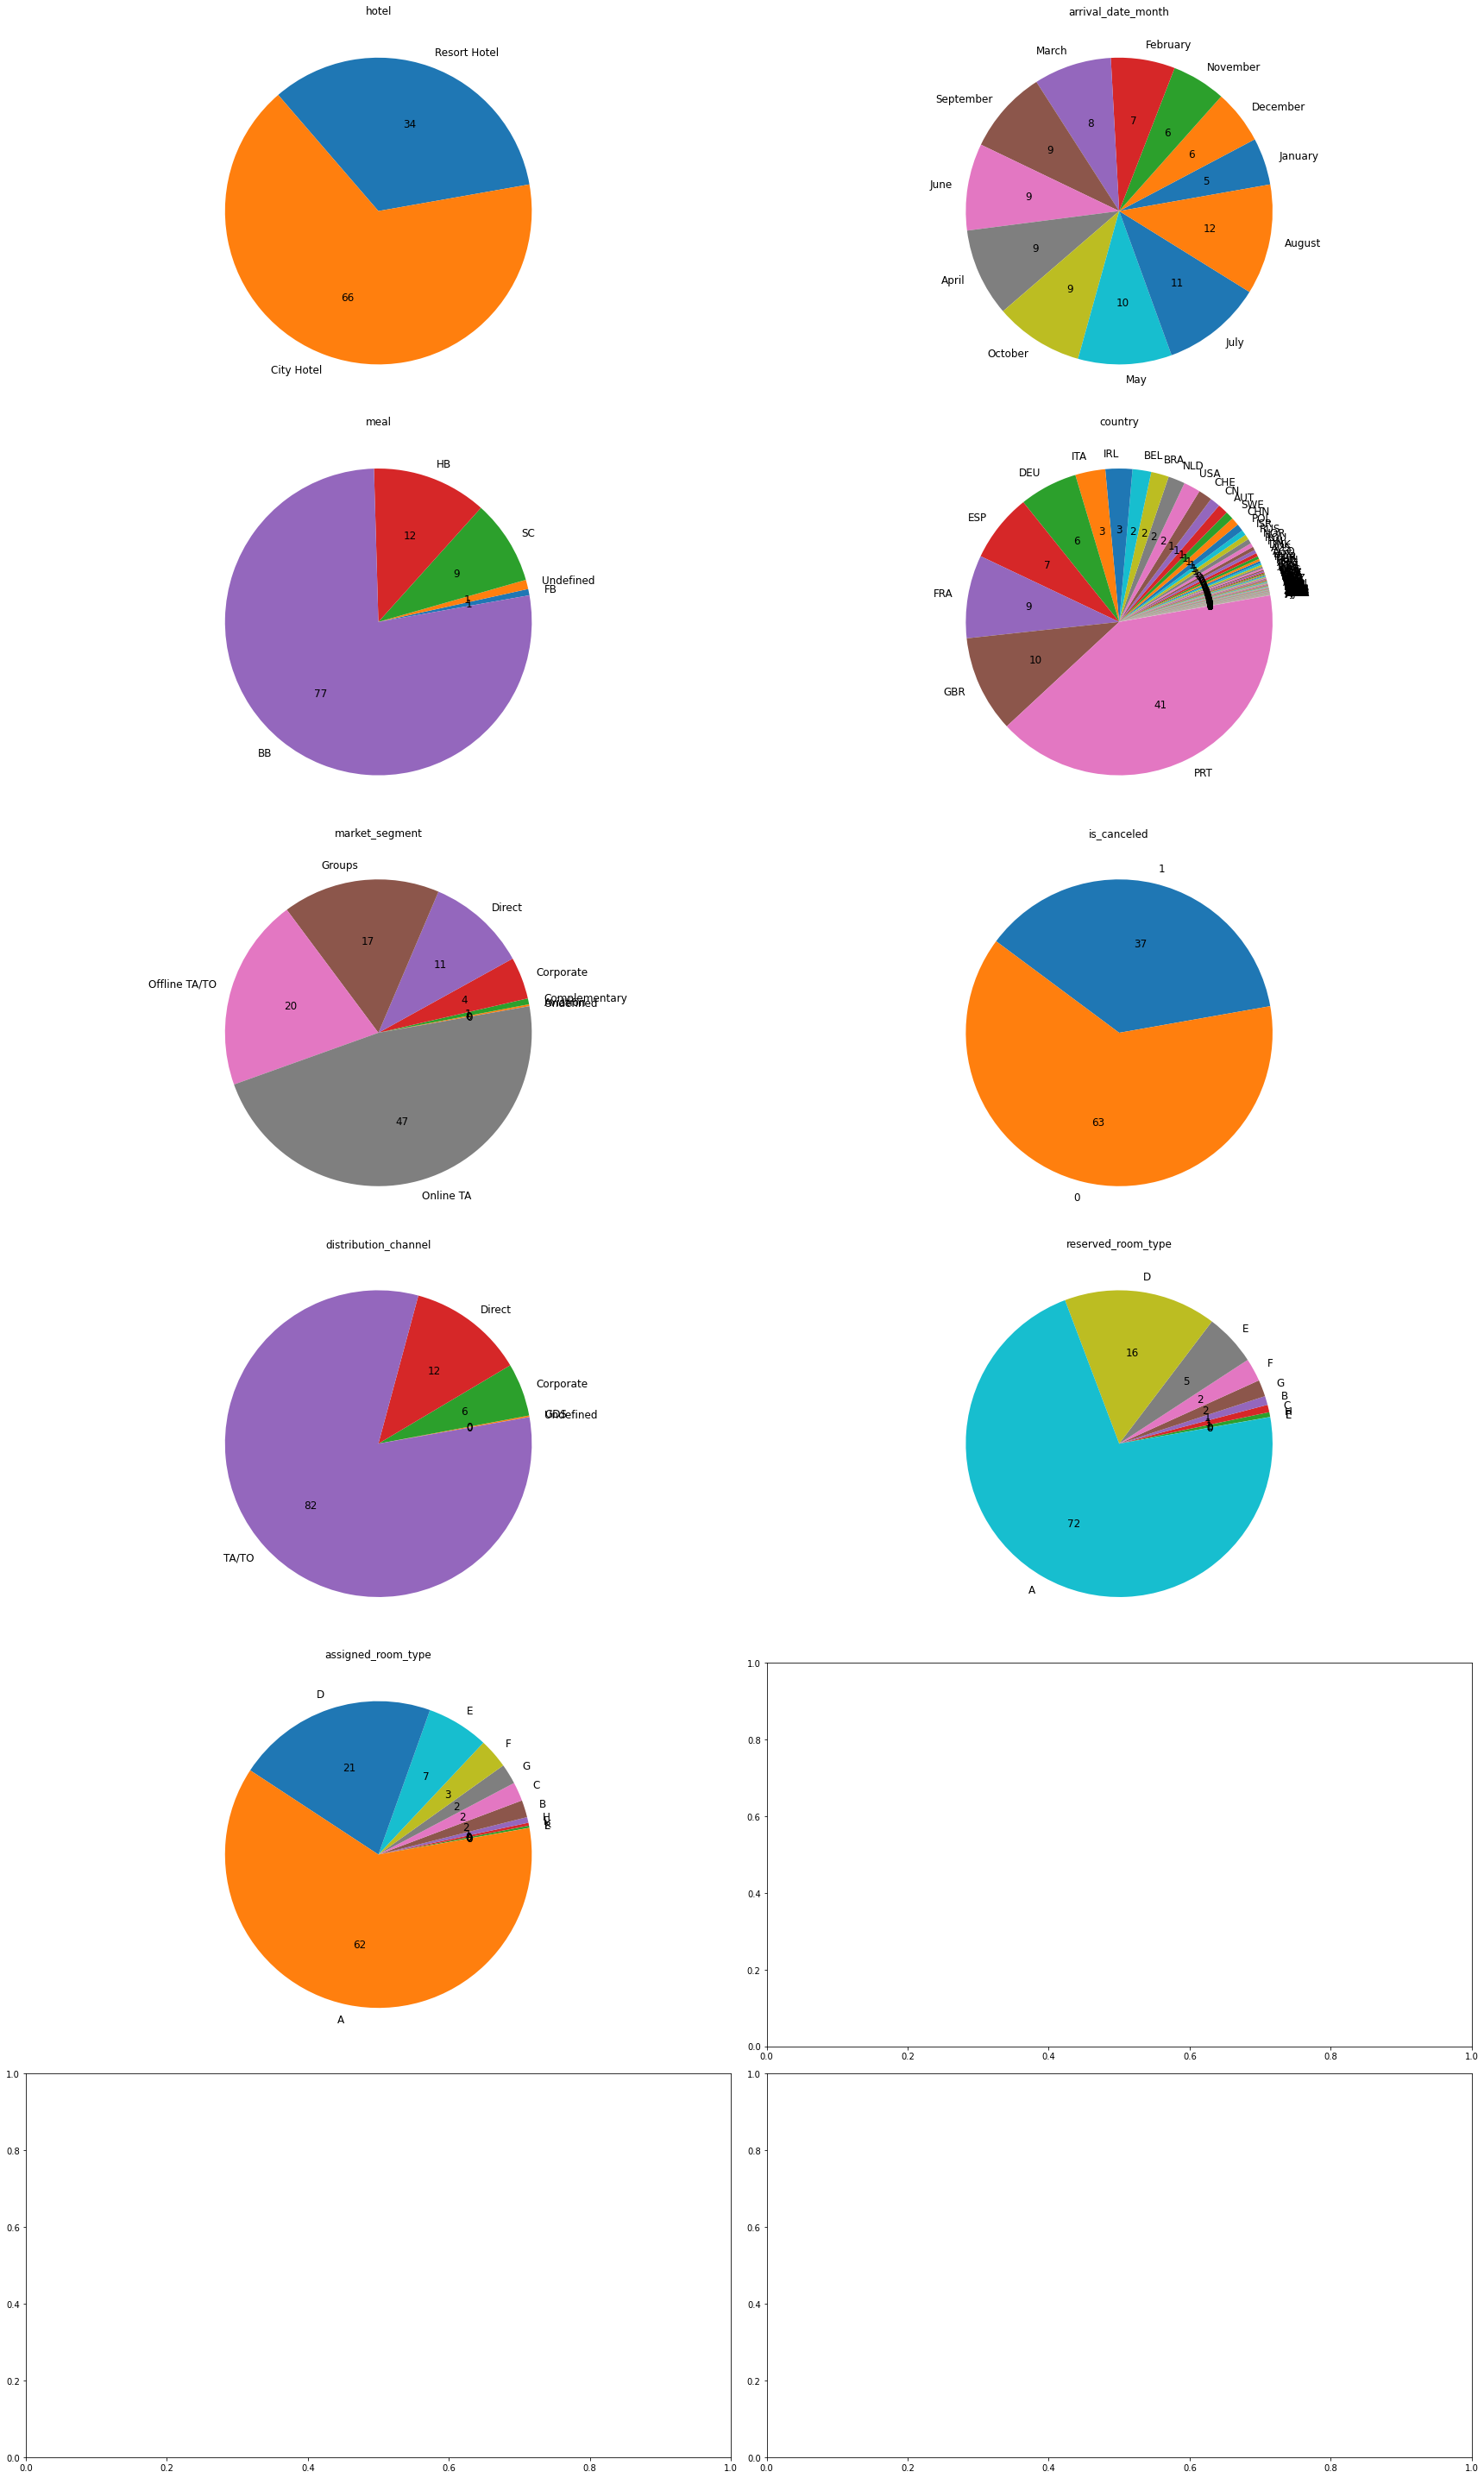

In [49]:
fig, axes = plt.subplots(6, 2, figsize=(24, 40))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(hoteldata_df[cat_cols]):
    _ = hoteldata_df[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12,startangle=10)
    
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()